In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
from notebooks.colorful_vectors.random_walk_builder import get_circle_points

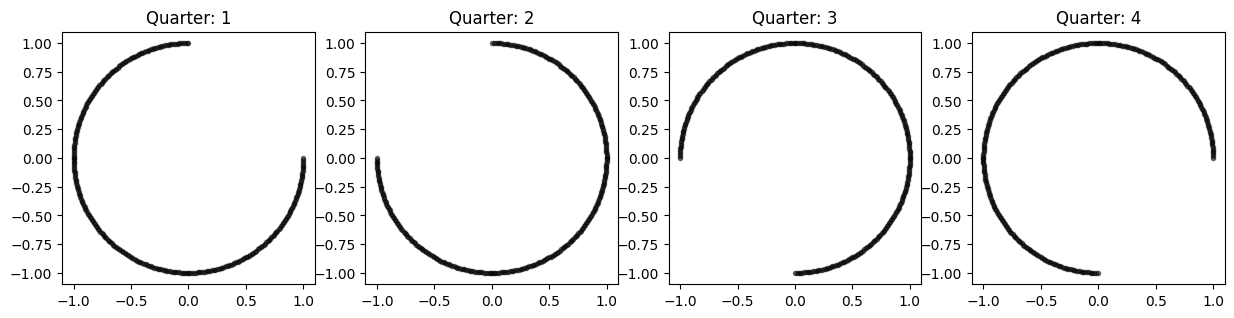

In [28]:
fig, ax = plt.subplots(1,4, figsize=(15,10))

for q_idx, q in enumerate(range(1, 5)):
    thetas = get_circle_points(q)
    ax[q_idx].plot(np.cos(thetas), np.sin(thetas), 'r.', alpha=.5)
    ax[q_idx].set_title('Quarter: %s' % q)
    ax[q_idx].axis('square')

plt.show()

In [6]:
CANVAS_W = 100
BORDERS = 50
CRITICAL_POINTS = [
    (0,0),
    (0, CANVAS_W),
    (CANVAS_W, 0),
    (CANVAS_W, CANVAS_W)
    ]
VECTOR_LEN = CANVAS_W * .125
VECTOR_LEN = CANVAS_W * .175
VECTOR_NUM = 9 * 7 # 7  is a color period. The rainbow repeats 9 times. Overal 63 vectors, 9 times of each color


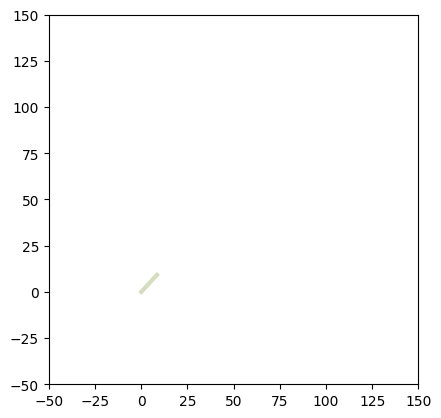

In [6]:
def new_coordinate(
        initial_coord: list[int],
        vector_length: float,
        angle_rad: float
    ):
    
    new_x = np.cos(angle_rad) * vector_length
    new_y = np.sin(angle_rad) * vector_length

    return (initial_coord[0]+new_x, initial_coord[1]+new_y)

a = [0,0]
b = new_coordinate([0,0], 12.5, np.random.rand()*np.pi/2)

def rand_color():
    return (np.random.rand(), np.random.rand(), np.random.rand())

plt.plot([a[0], b[0]], [a[1], b[1]], color=rand_color(), linewidth=3, alpha=.5)

plt.axis('square')
plt.axis([0-BORDERS, CANVAS_W+BORDERS, 0-BORDERS, CANVAS_W+BORDERS])
plt.show()

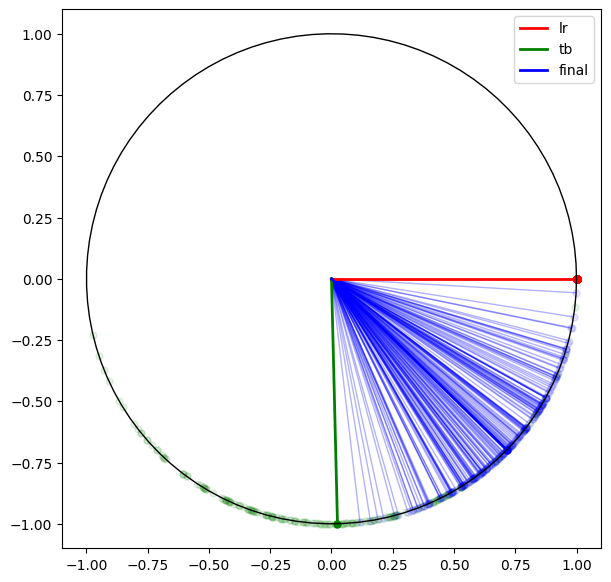

In [12]:
def proper_random_angle(cur_coord: list, max_x = CANVAS_W, max_y = CANVAS_W, num = 1):
    level_x = cur_coord[0] / max_x # measure of leftness / rightness
    level_y = cur_coord[1] / max_y # measure of bottomness / topness
    
    # this is main trend which should be balanced by opposite motion
    mu_scale_x = (0.5 - np.abs(0.5-level_x))*2
    mu_scale_y = (0.5 - np.abs(0.5-level_y))*2
    if level_x <= 0.5:
        left_right = np.random.randn(num)*np.pi*mu_scale_x
    else:
        left_right = np.random.randn(num)*np.pi*mu_scale_x+np.pi
    
    if level_y <= .5:
        top_bottom = np.random.randn(num)*np.pi*mu_scale_y + np.pi/2
    else:
        top_bottom = np.random.randn(num)*np.pi*mu_scale_y - np.pi/2
    
    final_angles = (top_bottom+left_right)/2
    
    return {'lr': left_right,
            'tb': top_bottom,
            'final': final_angles}

a = (0, 90)
angles_data = proper_random_angle(a, num=200)
angles = angles_data['final']

for angle in angles_data["lr"]:
    plt.plot(np.cos(angle), np.sin(angle), 'ro', alpha=.1, markersize=5)

for angle in angles_data["tb"]:
    plt.plot(np.cos(angle), np.sin(angle), 'go', alpha=.1, markersize=5)

for angle in angles_data["final"]:
    plt.plot([0,np.cos(angle)], [0,np.sin(angle)], 'b', alpha=.3, linewidth=1)
    plt.plot(np.cos(angle), np.sin(angle), 'bo', alpha=.1, markersize=5)



colors = ['r', 'g', 'b']
for data_idx, data in enumerate(angles_data):
    plt.plot([0, np.cos(np.average(angles_data[data]))], [0, np.sin(np.average(angles_data[data]))], '-', color=colors[data_idx], linewidth=2, label=f'{data}')
    plt.plot(np.cos(np.average(angles_data[data])),  np.sin(np.average(angles_data[data])), 'o', color=colors[data_idx], markersize=5)


thetas = np.linspace(0, 2*np.pi, 100)
x = np.cos(thetas)
y = np.sin(thetas)

plt.plot(x, y, '-k', linewidth=1)
plt.axis('square')
plt.legend()
plt.gcf().set_size_inches(7,7)
plt.show()

In [4]:
cur_coord = [0,0]
new_coord = [0,0]
angle_shift=0
colors = ['tab:purple', 'tab:blue', 'tab:green', 'yellow', 'tab:orange', 'tab:red']

for vector_idx in range(15):
    # print(f"Currently we are working on vector #{vector_idx} oo 10")
    random_angle = proper_random_angle(cur_coord)['final'][0] + angle_shift
        
    new_coord = new_coordinate(cur_coord, VECTOR_LEN, random_angle)
        
    plt.plot([cur_coord[0], new_coord[0]], [cur_coord[1], new_coord[1]], color = colors[vector_idx % len(colors)], linewidth=3)
    cur_coord = new_coord

plt.axis('square')
plt.axis([0-BORDERS, CANVAS_W+BORDERS, 0-BORDERS, CANVAS_W+BORDERS])
plt.gcf().set_size_inches(10,10)
plt.show()



NameError: name 'new_coordinate' is not defined

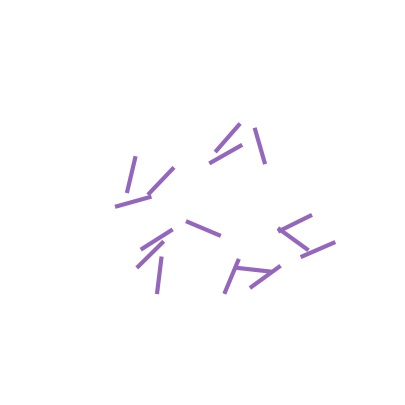

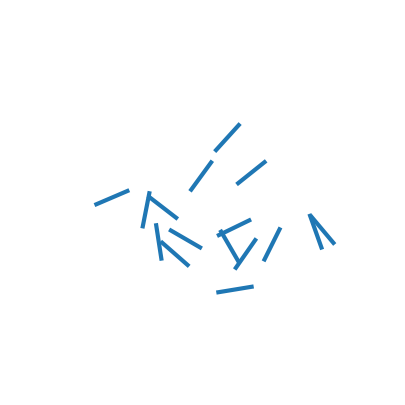

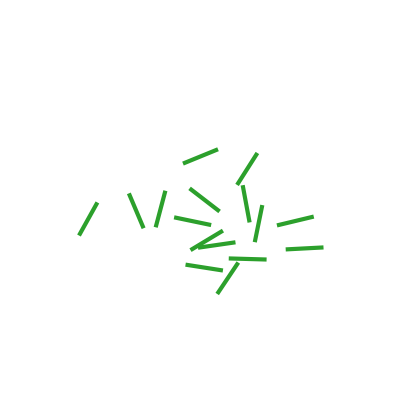

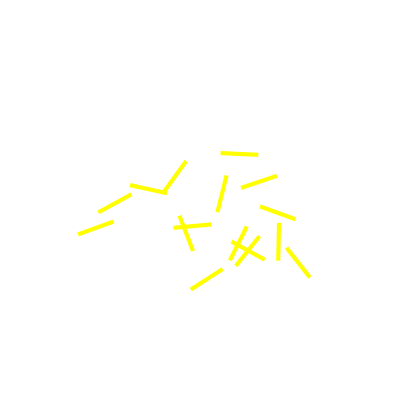

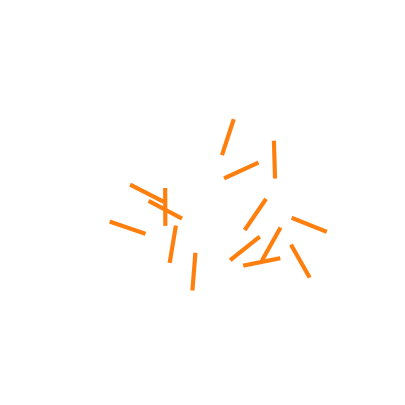

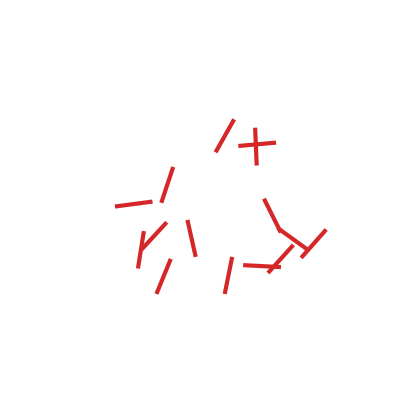

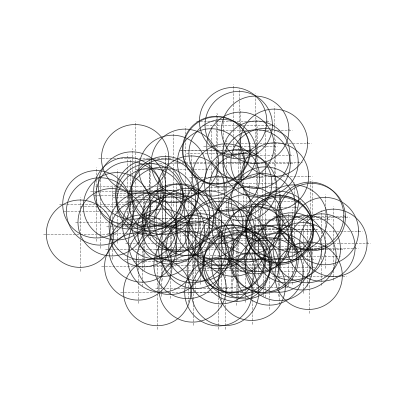

(-31.369520475301492, 137.06419730067668) (-25.014252413684808, 143.41946536229338)


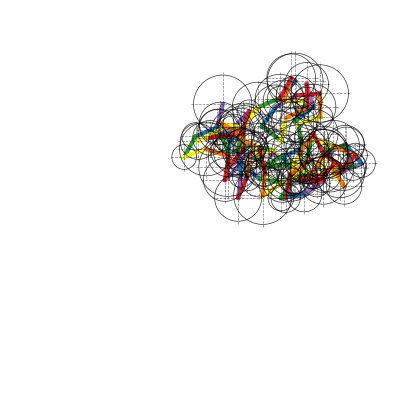

In [22]:
def random_walk_builder(
        num_vectors = 5,
        vector_len = VECTOR_LEN,
        cur_coord = None,
        max_x = CANVAS_W,
        max_y = CANVAS_W
    ):
    
    pi_quaters = np.pi/4

    if not cur_coord:
        cur_coord = (
            np.random.randint(0, max_x),
            np.random.randint(0, max_y)
        )
    
    result_coords = [cur_coord]

    for vector_idx in range(num_vectors):
    
        level_x = cur_coord[0] / max_x # measure of leftness / rightness
        level_y = cur_coord[1] / max_y # measure of bottomness / topness
        
        # this is main trend which should be balanced by opposite motion
        mu_scale_x = (0.5 - np.abs(0.5-level_x))*2
        mu_scale_y = (0.5 - np.abs(0.5-level_y))*2

        # even vector_idx scenario
        if vector_idx % 2 ==0:
            if level_x <= 0.5:
                left_right = np.random.randn()*np.pi*mu_scale_x
            else:
                left_right = np.random.randn()*np.pi*mu_scale_x+np.pi
            
            if level_y <= .5:
                top_bottom = np.random.randn()*np.pi*mu_scale_y + np.pi/2
            else:
                top_bottom = np.random.randn()*np.pi*mu_scale_y - np.pi/2
            
            theta = np.random.choice([left_right, top_bottom, (top_bottom+left_right)/2])

        else:
            # odd_vector_idx scenario            
            if theta>= 0 and theta <= np.pi/2:
                thetas_space = np.concatenate((np.linspace(np.pi/2, np.pi, 300), np.linspace(3*np.pi/2, 2*np.pi, 300)))
            elif theta <= np.pi:
                thetas_space = np.concatenate((np.linspace(0, np.pi/2, 300), np.linspace(np.pi, 3*np.pi/2, 300)))
            elif theta <= 3*np.pi/2:
                thetas_space = np.concatenate((np.linspace(np.pi/2, 3*np.pi/2, 300), np.linspace(3*np.pi/2, 2*np.pi, 300)))
            else:
                thetas_space = np.concatenate((np.linspace(0, np.pi/2), np.linspace(np.pi, 3*np.pi/2)))
            
            theta = np.random.choice(thetas_space)
        
        cur_coord = cur_coord[0]+np.cos(theta)*vector_len, cur_coord[1]+np.sin(theta)*vector_len
        result_coords.append(cur_coord)
    
    return result_coords

coords = random_walk_builder(num_vectors=np.random.randint(80,120))

x = [el[0] for el in coords]
y = [el[1] for el in coords]
colors = ['tab:purple', 'tab:blue', 'tab:green', 'yellow', 'tab:orange', 'tab:red']

theta_unit = np.linspace(0, 2*np.pi, 100)
now = datetime.utcnow()
now_f = now.strftime('%y%m%d_%H%M%S')
os.makedirs(now_f, exist_ok=True)
for color_idx, color in enumerate(colors):
    color_indexes = np.arange(color_idx, len(coords), len(colors))
    color_coords_x = [(coords[idx][0], coords[idx+1][0]) for idx in color_indexes if idx +1< len(coords)]
    color_coords_y = [(coords[idx][1], coords[idx+1][1]) for idx in color_indexes if idx +1 <len(coords)]
    for idx, color_coord in enumerate(color_coords_x):
        plt.plot(color_coords_x[idx], color_coords_y[idx], color = colors[color_idx], linewidth=3)
        
    plt.axis('square')
    plt.axis('off')
    plt.axis([0-BORDERS, CANVAS_W+BORDERS, 0-BORDERS, CANVAS_W+BORDERS])
    plt.gcf().set_size_inches(7,5)
    plt.savefig(f'{now_f}/{color_idx}.svg', dpi=100)
    plt.show()


for idx, color_coord in enumerate(coords, start=1):
    plt.plot(np.cos(theta_unit)*VECTOR_LEN+x[idx-1], np.sin(theta_unit)*VECTOR_LEN+y[idx-1], 'k-', linewidth=.5, alpha=.8)
    plt.plot([x[idx-1]-VECTOR_LEN*1.1, x[idx-1]+VECTOR_LEN*1.1], [y[idx-1], y[idx-1]], 'k--', linewidth=.5, alpha=.5)
    plt.plot([x[idx-1], x[idx-1]], [y[idx-1]-VECTOR_LEN*1.1, y[idx-1]+VECTOR_LEN*1.1], 'k--', linewidth=.5, alpha=.5)

plt.axis('square')
plt.axis('off')
plt.axis([0-BORDERS, CANVAS_W+BORDERS, 0-BORDERS, CANVAS_W+BORDERS])
plt.gcf().set_size_inches(7,5)
plt.savefig(f'{now_f}/circles.svg', dpi=100)
plt.show()

fig, ax = plt.subplots()
for color_idx, color in enumerate(colors):
    color_indexes = np.arange(color_idx, len(coords), len(colors))
    color_coords_x = [(coords[idx][0], coords[idx+1][0]) for idx in color_indexes if idx +1< len(coords)]
    color_coords_y = [(coords[idx][1], coords[idx+1][1]) for idx in color_indexes if idx +1 <len(coords)]
    for idx, color_coord in enumerate(color_coords_x):
        plt.plot(color_coords_x[idx], color_coords_y[idx], color = colors[color_idx], linewidth=3)
    
for idx, color_coord in enumerate(coords, start=1):
    vector_len = np.random.rand()*VECTOR_LEN*0.75 + VECTOR_LEN*0.5
    plt.plot(np.cos(theta_unit)*vector_len+x[idx-1], np.sin(theta_unit)*vector_len+y[idx-1], 'k-', linewidth=.5, alpha=.8)
    plt.plot([x[idx-1]-vector_len*1.1, x[idx-1]+vector_len*1.1], [y[idx-1], y[idx-1]], 'k--', linewidth=.5, alpha=.5)
    plt.plot([x[idx-1], x[idx-1]], [y[idx-1]-vector_len*1.1, y[idx-1]+vector_len*1.1], 'k--', linewidth=.5, alpha=.5)

plt.axis('square')
plt.axis('off')
print(ax.get_xlim(), ax.get_ylim())
lim = np.round(np.max([ax.get_xlim(), ax.get_ylim()]),0)
plt.axis([-lim, lim, -lim, lim])
plt.gcf().set_size_inches(7,5)
plt.savefig(f'{now_f}/full.svg', dpi=100)
plt.show()


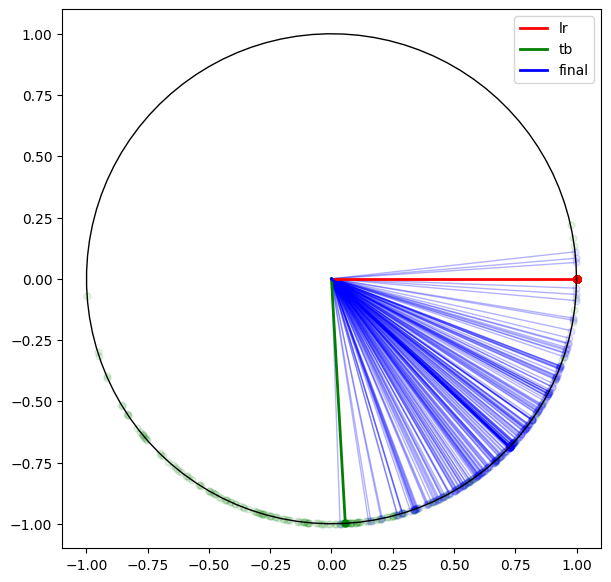

In [14]:
a = (0, 90)
angles_data = proper_random_angle(a, num=200)
angles = angles_data['final']

for angle in angles_data["lr"]:
    plt.plot(np.cos(angle), np.sin(angle), 'ro', alpha=.1, markersize=5)

for angle in angles_data["tb"]:
    plt.plot(np.cos(angle), np.sin(angle), 'go', alpha=.1, markersize=5)

for angle in angles_data["final"]:
    plt.plot([0,np.cos(angle)], [0,np.sin(angle)], 'b', alpha=.3, linewidth=1)
    plt.plot(np.cos(angle), np.sin(angle), 'bo', alpha=.1, markersize=5)



colors = ['r', 'g', 'b']
for data_idx, data in enumerate(angles_data):
    plt.plot([0, np.cos(np.average(angles_data[data]))], [0, np.sin(np.average(angles_data[data]))], '-', color=colors[data_idx], linewidth=2, label=f'{data}')
    plt.plot(np.cos(np.average(angles_data[data])),  np.sin(np.average(angles_data[data])), 'o', color=colors[data_idx], markersize=5)


thetas = np.linspace(0, 2*np.pi, 100)
x = np.cos(thetas)
y = np.sin(thetas)

plt.plot(x, y, '-k', linewidth=1)
plt.axis('square')
plt.legend()
plt.gcf().set_size_inches(7,7)
plt.show()